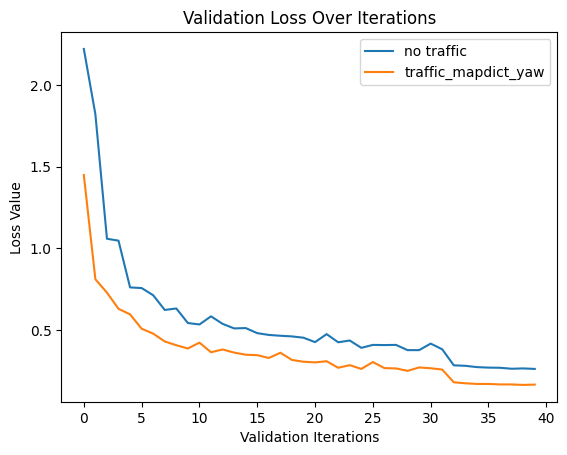

In [15]:
import matplotlib.pyplot as plt

def read_loss_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    loss_values = []

    for line in lines:
        if line.startswith('loss'):
            tokens = line.split()
            # 损失值在第二个位置
            loss = float(tokens[3][:5])
            loss_values.append(loss)

    return loss_values



# file_path = '/data/fyy/Carla_prediction/weight_and_log/log'
file_path = '/data/fyy/Carla_prediction/weight_and_log_all/log'
# file_path_traffic = '/data/fyy/Carla_prediction_traffic/weight_and_log_all/log'
file_path_traffic = '/data/fyy/Carla_prediction_traffic/weight_and_log_trafficLight/log'
file_path_traffic_mapdict = '/data/fyy/Carla_prediction_traffic/weight_and_log_trafficLight_mapdict/log'
file_path_traffic_mapdict_b = '/data/fyy/Carla_prediction_traffic/weight_and_log_trafficLight_mapdict_batchnorm/log'
file_path_traffic_yaw = '/data/fyy/Carla_prediction_traffic/weight_and_log_trafficLight_mapdict_yaw/log'


loss_values = read_loss_from_file(file_path)
loss_values_traffic = read_loss_from_file(file_path_traffic)
loss_values_traffic_mapdict = read_loss_from_file(file_path_traffic_mapdict)
loss_values_traffic_mapdict_b = read_loss_from_file(file_path_traffic_mapdict_b)
loss_values_traffic_yaw = read_loss_from_file(file_path_traffic_yaw)

plt.plot(loss_values[:40], label='no traffic')
# plt.plot(loss_values_traffic, label='traffic')
# plt.plot(loss_values_traffic_mapdict, label='traffic_mapdict')
# plt.plot(loss_values_traffic_mapdict_b, label='traffic_mapdict_batchnorm')
plt.plot(loss_values_traffic_yaw, label='traffic_mapdict_yaw')

plt.xlabel('Validation Iterations')
plt.ylabel('Loss Value')
plt.title('Validation Loss Over Iterations')
plt.legend()
plt.savefig('loss.png')
plt.show()


In [ ]:
import pickle

with open('test_data_yaw.pkl', 'rb') as test_file:
    test_data = pickle.load(test_file)


test_loader = DataLoader(
    test_data,
    batch_size=config["batch_size"],
    shuffle=True,
    collate_fn=collate_fn,
    pin_memory=True,
)


preds = {}
gts = {}
cities = {}

for ii, data in tqdm(enumerate(data_loader)):
    data = dict(data)
    with torch.no_grad():
        rel, output = net(data)
    # break
        results = [x[0:1].detach().cpu().numpy() for x in output["reg"]]
    for i, (argo_idx, pred_traj) in enumerate(zip(data["argo_id"], results)):
        preds[argo_idx] = pred_traj.squeeze()
        cities[argo_idx] = data["city"][i]
        gts[argo_idx] = data["gt_preds"][i][0] if "gt_preds" in data else None

# save for further visualizations
res = dict(
    preds = preds,
    gts = gts,
    cities = cities,
)